<a href="https://colab.research.google.com/github/GentleBreeze7/AIFFEL_quest_cr/blob/main/MainQuest/Quest04/M3_Datathon_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미국 콘텐츠의 키워드, 배우/감독, 장르 트렌드 분석
## 현이지기

1. 미국 콘텐츠의 `description`을 분석하여 **주요 키워드와 감성 분석** (긍정/부정 감성)
2. 미국에서 어떤 등급의 콘텐츠가 많은가?
3. 미국 콘텐츠의 **주요 장르와 트렌드**는 어떻게 변화하고 있는가?

**1) 데이터셋 개요** :

현재 넷플릭스에 있는 **영화/드라마 데이터셋** (오징어게임도 있음!!)

넷플릭스 등 다양한 OTT 서비스의 데이터를 분석하여 **사이트별 고객층**인구통계학적 특성, 선호 장르, 평점, 경향성 등 특징 비교

**다양한 OTT플랫폼 데이터셋과 연계**해서 비교 가능한 데이터

**2) 데이터셋 출처 및 다운로드 :**

- 넷플릭스(대표작: **<오징어게임> 2021, <기묘한 이야기> 2016~ 등)**
- [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- 아마존프라임(대표작: **<더 보이즈> 2019~, <업로드> 2020~ 등)**
    
    [Amazon Prime Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)
    
- 디즈니플러스(대표작: **마블류, 디즈니류, 픽사류** 등)
    
    [Disney+ Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows)

# **1일차(2/18) :** 팀 빌딩과 데이터 분석

- OT ( 10:10 ~ 10:30 )

- 팀별 아이스브레이킹

- 데이터 분석

    - 파일별 데이터 확인
    - 데이터 상세 내용 확인
    - 데이터셋 간 연계방안 고민
    - 분석 방향 논의(주제 선정)

# 파일별 데이터 확인
- df_nf: 넷플릭스 데이터셋
- df_am: 아마존 데이터셋
- df_dp: 디즈니 플러스 데이터셋


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:00<00:00, 2.55MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


## 넷플릭스 데이터셋 import

In [ ]:
import os
import pandas as pd

# CSV 파일 로드 (파일명 확인 후 지정)
file_path = os.path.join(path, "netflix_titles.csv")  # 실제 파일명을 확인 후 수정 필요
df_nf = pd.read_csv(file_path)

# 데이터 미리보기
df_nf.head() # 상위 5개 행 출력

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_nf[df_nf['country']=='South Korea']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
104,s105,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,"September 6, 2021",2016,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...
124,s125,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,"September 2, 2021",2013,TV-Y7,3 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a..."
289,s290,TV Show,The Crowned Clown,NaN,"Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jun...",South Korea,"August 10, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Standing in for an unhinged Joseon king, a loo..."
456,s457,TV Show,Her Private Life,NaN,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,"July 15, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","An art curator's life unravels, as she tries t..."
545,s546,TV Show,YooHoo to the Rescue,NaN,"Kira Buckland, Ryan Bartley, Bryce Papenbrook,...",South Korea,"July 6, 2021",2020,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","In a series of magical missions, quick-witted ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8463,s8464,Movie,The President's Barber,Chan-sang Lim,"Kang-ho Song, So-ri Moon, Jae-eung Lee, Yeong-...",South Korea,"October 1, 2017",2004,TV-MA,116 min,"Comedies, Dramas, International Movies","The personal barber to the president, as well ..."
8467,s8468,Movie,The Prison,Na Hyeon,"Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Wo...",South Korea,"November 18, 2017",2017,TV-MA,125 min,"Action & Adventure, Dramas, International Movies",A cop-turned-convict discovers a crime syndica...
8575,s8576,TV Show,This Is My Love,NaN,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,"May 22, 2017",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...
8613,s8614,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,"March 18, 2017",2016,TV-MA,118 min,"Action & Adventure, Horror Movies, Internation...","As a zombie outbreak sweeps the country, a dad..."


### 데이터 기본 정보 확인

In [ ]:
df_nf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df_nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 아마존 데이터셋 import

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/amazon-prime-movies-and-tv-shows")

print("Path to dataset files:", path)

100%|██████████| 1.61M/1.61M [00:00<00:00, 2.86MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/amazon-prime-movies-and-tv-shows/versions/1


In [ ]:
import os
import pandas as pd

# CSV 파일 로드 (파일명 확인 후 지정)
file_path = os.path.join(path, "amazon_prime_titles.csv")  # 실제 파일명을 확인 후 수정 필요
df_am = pd.read_csv(file_path)

# 데이터 미리보기
df_am.head() # 상위 5개 행 출력

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### 데이터 기본 정보 확인

In [ ]:
df_am.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
df_am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
df_am.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
df_am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


## 디즈니플러스 데이터셋 import

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/disney-movies-and-tv-shows")

print("Path to dataset files:", path)

100%|██████████| 131k/131k [00:00<00:00, 583kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/disney-movies-and-tv-shows/versions/2


In [ ]:
import os
import pandas as pd

# CSV 파일 로드 (파일명 확인 후 지정)
file_path = os.path.join(path, "disney_plus_titles.csv")  # 실제 파일명을 확인 후 수정 필요
df_dp = pd.read_csv(file_path)

# 데이터 미리보기
df_dp.head() # 상위 5개 행 출력

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### 데이터 기본 정보 확인

In [ ]:
df_dp.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [ ]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


### 컬럼 추가

In [ ]:
df_nf["platform"] = 'Netflix'
df_am["platform"] = 'Amazon'
df_dp["platform"] = 'Disney'

In [ ]:
df_dp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney


### show_id 제거

In [ ]:
df_nf.drop('show_id',axis=1, inplace=True)
df_am.drop('show_id',axis=1, inplace=True)
df_dp.drop('show_id',axis=1, inplace=True)

In [ ]:
df_dp.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney


### Platform 기준으로 병합

In [ ]:
df_main = pd.concat([df_nf, df_am, df_dp], axis=0)

df_main.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


## 미국 데이터만 뽑기

In [ ]:
df_main = df_main[df_main['country'] == 'United States']

In [ ]:
df_main.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Netflix
15,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,Netflix
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,Netflix
28,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,Netflix


### 필요없는 키워드 제거: director, cast, duration, country, date_added

In [ ]:
df_main.drop(['director', 'cast', 'duration', 'country', 'date_added'], axis=1, inplace=True)

In [ ]:
df_main.head()

,type,title,release_year,rating,listed_in,description,platform
0,Movie,Dick Johnson Is Dead,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",Netflix
9,Movie,The Starling,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Netflix
15,TV Show,Dear White People,2021,TV-MA,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,Netflix
27,Movie,Grown Ups,2010,PG-13,Comedies,Mourning the loss of their beloved junior high...,Netflix
28,Movie,Dark Skies,2013,PG-13,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,Netflix


### 중복 데이터, 결측치 처리
### 날짜 및 시간 형식 통일

In [ ]:
df_main.duplicated().sum() # 중복 데이터 없음

0

In [ ]:
len(df_main)

4076

In [ ]:
df_main.isnull().sum() # 결측치 확인

,0
type,0
title,0
release_year,0
rating,7
listed_in,0
description,0
platform,0


In [ ]:
df_nf = df_nf.dropna() # 결측치 제거
print(df_nf.isnull().sum()) # 결측치 확인
print(len(df_nf)) # 총 개수 확인

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
platform        0
dtype: int64
5332


In [ ]:
df_main = df_main.reset_index(drop=True)

In [ ]:
df_main

,type,title,release_year,rating,listed_in,description,platform
0,Movie,Dick Johnson Is Dead,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,Movie,The Starling,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Netflix
2,TV Show,Dear White People,2021,TV-MA,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,Netflix
3,Movie,Grown Ups,2010,PG-13,Comedies,Mourning the loss of their beloved junior high...,Netflix
4,Movie,Dark Skies,2013,PG-13,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,Netflix
...,...,...,...,...,...,...,...
4071,Movie,Those Calloways,1965,PG,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...,Disney
4072,TV Show,Disney Kirby Buckets,2014,TV-Y7,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,Disney
4073,TV Show,Imagination Movers,2008,TV-Y,"Kids, Music","Rock out with the Imagination Movers, Disney J...",Disney
4074,Movie,Aquamarine,2006,PG,"Comedy, Coming of Age, Fantasy",Two 13-year-old best friends embark on an adve...,Disney


# 1. 미국 콘텐츠의 description을 분석하여 주요 키워드와 감성 분석 (긍정/부정 감성)

In [ ]:
# 곽현정님

# 2. 미국에서 어떤 등급의 콘텐츠가 많은가?

In [ ]:
# 성기수님

# 3. 미국 콘텐츠의 주요 장르와 트렌드는 어떻게 변화하고 있는가?

In [ ]:
# 권이삭님

<Figure size 1200x600 with 0 Axes>

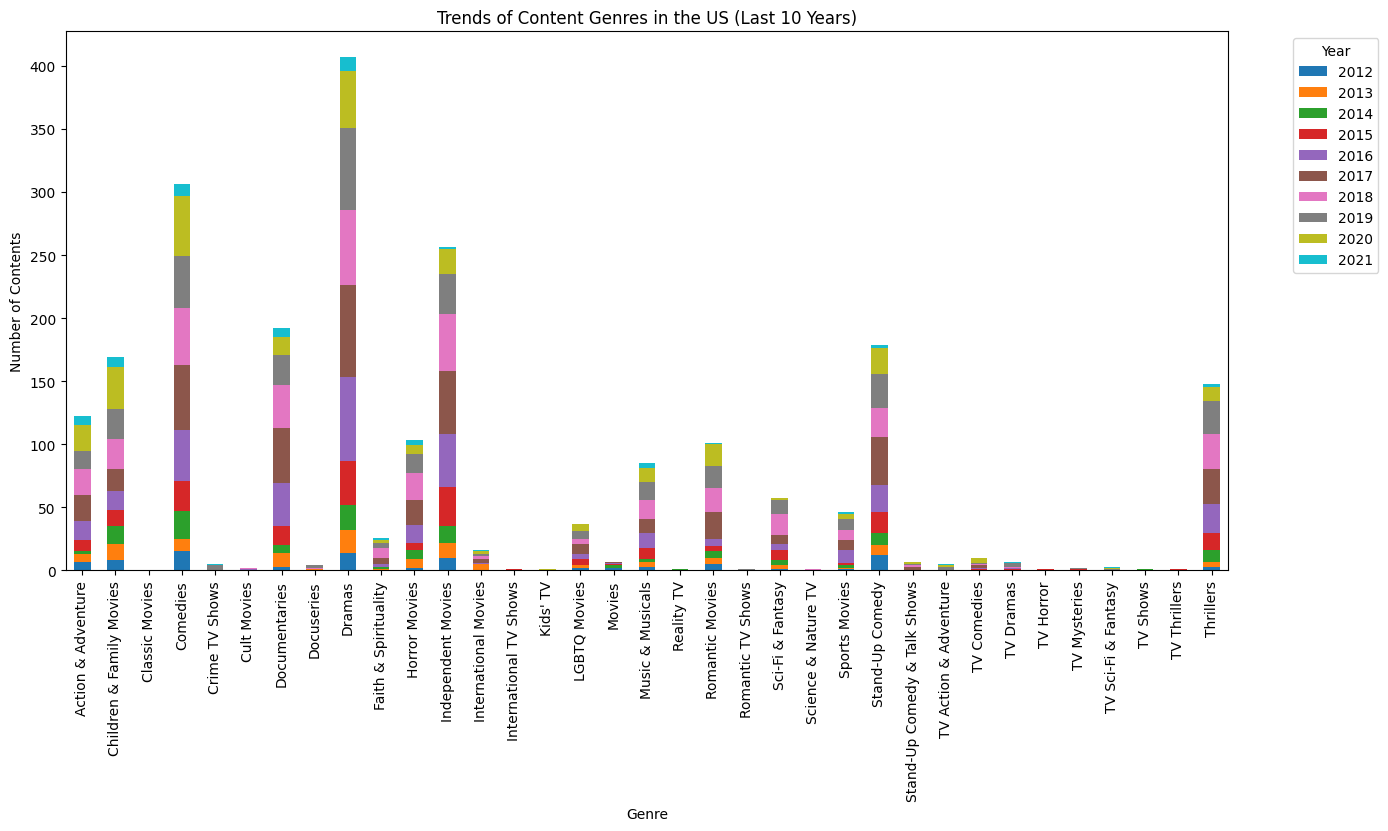

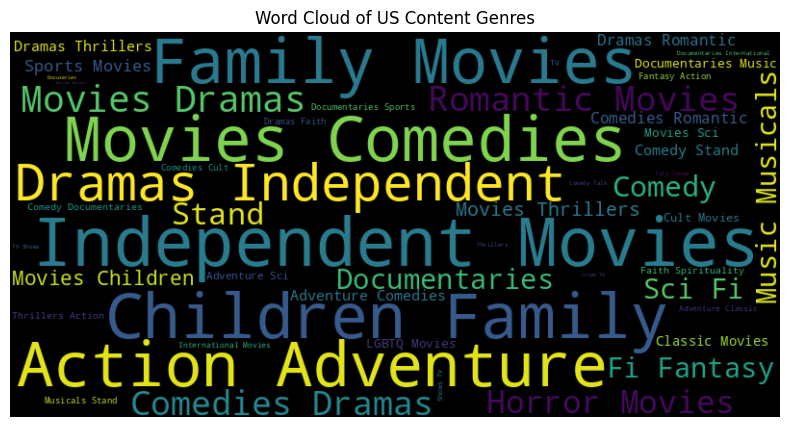

<ipython-input-35-2a86065ce217>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')


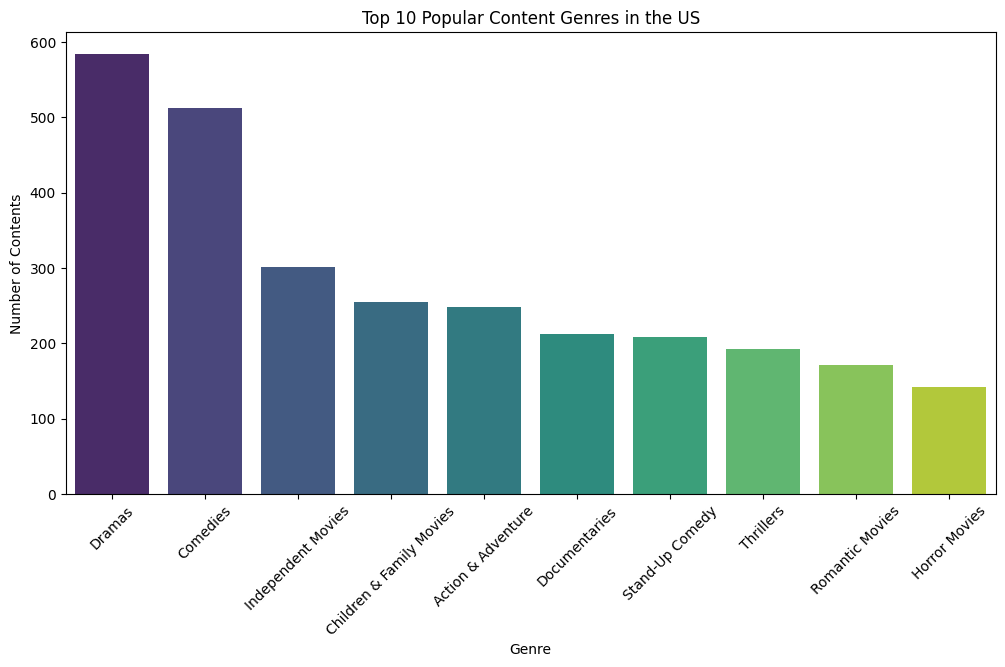

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 'United States' 데이터를 필터링
# (미국에서 제작된 콘텐츠만을 분석 대상으로 선정)
df_us = df_nf[df_nf['country'] == 'United States'].copy()

# 'release_year'을 정수형으로 변환
# (데이터 분석을 위해 문자열에서 정수형으로 변경)
df_us['release_year'] = df_us['release_year'].astype(int)

# 장르 데이터를 리스트 형태로 변환
# (각 콘텐츠는 여러 개의 장르를 가질 수 있으므로 리스트로 변환 후 확장)
df_us['listed_in'] = df_us['listed_in'].str.split(', ')
df_exploded = df_us.explode('listed_in')

# 연도별 장르 트렌드 분석
# (연도별로 각 장르의 등장 횟수를 집계하고, NaN 값은 0으로 대체)
genre_trend = df_exploded.groupby(['release_year', 'listed_in']).size().unstack().fillna(0)

# 최근 10년간 장르 트렌드 시각화
plt.figure(figsize=(12, 6))
genre_trend.tail(10).T.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Trends of Content Genres in the US (Last 10 Years)')
plt.xlabel('Genre')
plt.ylabel('Number of Contents')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 워드클라우드 생성
# (가장 많이 등장하는 장르를 한눈에 볼 수 있도록 시각화)
text = ' '.join(df_exploded['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of US Content Genres')
plt.show()

# 장르별 콘텐츠 수 변화 분석
# (가장 인기 있는 상위 10개 장르를 선정하고 시각화)
genre_count = df_exploded['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Popular Content Genres in the US')
plt.xlabel('Genre')
plt.ylabel('Number of Contents')
plt.show()

# 회고
# 1. 미국에서 제작된 콘텐츠를 대상으로 장르별 트렌드를 분석하였다.
# 2. 최근 10년 동안 특정 장르(예: 다큐멘터리, 코미디, 드라마)의 인기가 지속적으로 높음을 확인할 수 있었다.
# 3. 워드클라우드를 통해 어떤 장르가 가장 자주 등장하는지 시각적으로 파악할 수 있었다.
# 4. 장르별 콘텐츠 수 분석 결과, 특정 장르가 압도적으로 많음을 알 수 있었고, 이를 통해 시장 트렌드를 예측할 수 있다.
# 5. 향후 추가적인 분석(예: 장르별 성장률, 특정 장르의 하락 추이 등)을 수행하면 더 깊은 인사이트를 얻을 수 있을 것이다.






